In [80]:
# importing libararies
import pandas as pd

In [81]:
# reading files
dataset = pd.read_csv('./Melbourne_housing_FULL.csv')

In [82]:
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount', 
               'Distance','Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']
dataset = dataset[cols_to_use]

In [83]:
dataset.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,3.0,2.0,0.0,134.0,150.0,1465000.0


In [84]:
# List of column names to keep in the dataset
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 
               'Propertycount', 'Distance','Bedroom2', 'Bathroom', 'Car', 
               'Landsize', 'BuildingArea', 'Price']

# Selecting only the specified columns from the dataset
dataset = dataset[cols_to_use]


# missing values

In [85]:
cols_to_fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']
dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0)

dataset['Landsize'] = dataset['Landsize'].fillna(dataset.Landsize.mean())
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset.BuildingArea.mean())

In [86]:
# List of columns where missing values will be filled with zeros
cols_to_fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']
dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0)

# Filling missing values in the 'Landsize' column with the mean value of the column
dataset['Landsize'] = dataset['Landsize'].fillna(dataset['Landsize'].mean())

# Filling missing values in the 'BuildingArea' column with the mean value of the column
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset['BuildingArea'].mean())


In [89]:
# Droping rows with missing values from the DataFrame
dataset.dropna(inplace=True)


In [90]:
dataset.shape

(27244, 14)

# outlier handling

In [93]:
from scipy import stats
# Calculating the first quartile (Q1)
q1 = dataset['Rooms'].quantile(q=0.25)

# Calculating the third quartile (Q3)
q3 = dataset['Rooms'].quantile(q=0.75)

# Calculating the interquartile range (IQR)
IQR = q3 - q1

# Printing the results
print('1st quartile = {} \n3rd quartile range = {} \ninterquartile range = {} '
      .format(q1, q3, stats.iqr(dataset['Rooms'])))


1st quartile = 2.0 
3rd quartile range = 4.0 
interquartile range = 2.0 


In [94]:
# Calculating lower bound for outliers
lower_outlier = q1 - 1.5 * IQR

# Calculating upper bound for outliers
upper_outlier = q3 + 1.5 * IQR

# Printing the results
print('lower outlier = ', lower_outlier)
print('upper outlier = ', upper_outlier)


lower outlier =  -1.0
upper outlier =  7.0


In [95]:
# Printing the number of upper outliers
print('Number of upper outliers = ',
      dataset[dataset['Rooms'] > upper_outlier]['Rooms'].count())

# Printing the number of lower outliers
print('Number of lower outliers = ',
      dataset[dataset['Rooms'] < lower_outlier]['Rooms'].count())


Number of upper outliers =  23
Number of lower outliers =  0


In [96]:
# Replacing outliers with the median value of 'Rooms'
dataset.loc[(dataset['Rooms'] < lower_outlier) | (dataset['Rooms'] > upper_outlier),
            ['Rooms']] = dataset['Rooms'].median()


In [97]:
# Printing the number of upper outliers after handling outliers
print('Number of upper outliers = ',
      dataset[dataset['Rooms'] > upper_outlier]['Rooms'].count())

# Printing the number of lower outliers after handling outliers
print('Number of lower outliers = ',
      dataset[dataset['Rooms'] < lower_outlier]['Rooms'].count())


Number of upper outliers =  0
Number of lower outliers =  0


In [121]:
for cols in dataset.columns[:-1]:
    # Checking if the column dtype is object (categorical)
    if dataset[cols].dtype == object:
        continue
    else:
        # Calculating quartiles and IQR
        Q1 = dataset[cols].quantile(q=0.25)
        Q3 = dataset[cols].quantile(q=0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        low = Q1 - 1.5 * IQR
        high = Q3 + 1.5 * IQR

        # Replace values outside the bounds with t


In [122]:
for cols in dataset.columns[:-1]:
    # Check if the column dtype is object (categorical)
    if dataset[cols].dtype == object:
        continue
    else:
        # Calculate quartiles and IQR
        Q1 = dataset[cols].quantile(q=0.25)
        Q3 = dataset[cols].quantile(q=0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        low = Q1 - 1.5 * IQR
        high = Q3 + 1.5 * IQR

        # Replace values outside the bounds with the median
        dataset.loc[(dataset[cols] < low) | (dataset[cols] > high), cols] = dataset[cols].median()


C:\Users\DSP yONPHULA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


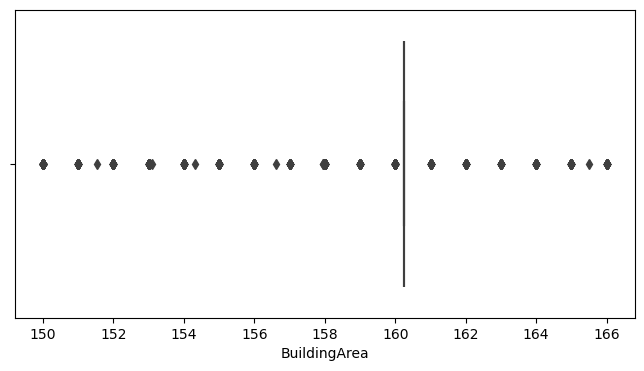

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(8, 4))

# Create a horizontal boxplot for the 'BuildingArea' column
sns.boxplot(x='BuildingArea', data=dataset, orient='h')

# Show the plot
plt.show()


In [129]:
dataset.corr()

ValueError: could not convert string to float: 'Abbotsford'

In [128]:
# Printing the original shape of the dataset
print(dataset.shape)

# Droping non-numerical columns from the dataset
dataset1_num_col = dataset.drop(['Car', 'Suburb', 'Type', 'Method', 'SellerG', 'Regionname', 'Price'], axis=1)

# Printing the shape of the dataset after dropping columns
print(dataset1_num_col.shape)

# Displaying the first few rows of the resulting dataset
dataset1_num_col.head()


(27244, 14)
(27244, 7)


,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Landsize,BuildingArea
1,2,4019.0,2.5,2.0,1.0,202.0,160.2564
2,2,4019.0,2.5,2.0,1.0,156.0,160.2564
4,3,4019.0,2.5,3.0,2.0,134.0,150.0000
5,3,4019.0,2.5,3.0,2.0,94.0,160.2564
6,4,4019.0,2.5,3.0,1.0,120.0,160.2564


In [108]:
dataset_cat = pd.get_dummies(dataset, drop_first=True)
print(dataset_cat.shape)

(27244, 713)


In [109]:
# One-hot encoding for categorical columns
X_encoded = pd.get_dummies(X, drop_first=True)

In [21]:
dataset= pd.concat([dataset1_num_col,dataset_cat],axis = 1)
dataset.shape

(27244, 720)

# Data Standardization

In [98]:
# Create the feature matrix X by dropping the 'Price' column
X = dataset.drop('Price', axis=1)

# Create the target variable y, using only the 'Price' column
y = dataset['Price']

# Print the shape of X and y
print(X.shape)
print(y.shape)


(27244, 13)
(27244,)


In [50]:
from sklearn.preprocessing import StandardScaler
# defineing min max scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)

In [99]:
from sklearn.model_selection import train_test_split

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size=0.2, random_state=40)


In [100]:
from sklearn.linear_model import LinearRegression

# Creating a linear regression model and fit it to the training data
reg = LinearRegression().fit(X_train, y_train)

# Making predictions on the test set
Reg_predict = reg.predict(X_test)

# Making predictions on the training set
Reg_pred_train = reg.predict(X_train)


In [101]:
from sklearn import metrics

# Calculating and print R-squared score for the test set
print("R score:", metrics.r2_score(y_test, Reg_predict))

# Calculating and print mean squared error (MSE) for the test set
print("MSE =", metrics.mean_squared_error(y_test, Reg_predict))

# Calculating and print R-squared score for the training set
print("R_score:", metrics.r2_score(y_train, Reg_pred_train))

# Calculating and print mean squared error (MSE) for the training set
print("MSE Train:", metrics.mean_squared_error(y_train, Reg_pred_train))


R score: -9.192663192809993e+26
MSE = 3.8074481633240254e+38
R_score: 0.6778666959333708
MSE Train: 132336465413.12682


In [27]:
## single
# Extracting a single feature 'Rooms' and reshaping it
x = dataset['Rooms'].ilocr[:,:-1].values
y = dataset['Price'].values
print(x.shape)
print(y.shape)

(27244, 1)
(27244,)


In [28]:
from sklearn.preprocessing import StandardScaler
# define min max scaler
scaler=StandardScaler()
# transform data
scaled=scaler.fit_transform(x)

In [130]:
from sklearn.model_selection import train_test_split

# scaled: Your feature matrix (X) after applying StandardScaler
# y: Your target variable (y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size=0.2, random_state=40)


In [131]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model and fit it to the training data
reg = LinearRegression().fit(X_train, y_train)

# Make predictions on the test set
Reg_predict = reg.predict(X_test)

# Make predictions on the training set
Reg_train_predict = reg.predict(X_train)


In [31]:
from sklearn import metrics

# Calculating and print R-squared for the test set
print("R score Test", metrics.r2_score(y_test, Reg_predict))

# Calculate and print Mean Squared Error (MSE) for the test set
print("MSE Test= ", metrics.mean_squared_error(y_test, Reg_predict))

# Calculating and print R-squared for the training set
print("R score Train", metrics.r2_score(y_train, Reg_train_predict))

# Calculating and print Mean Squared Error (MSE) for the training set
print("MSE Train= ", metrics.mean_squared_error(y_train, Reg_train_predict))


R score Test 0.20903108291078887
MSE Test=  327606166727.96204
R score Train 0.21747225615327836
MSE Train=  321472366877.5471


In [115]:
from sklearn.linear_model import Lasso

# Import Lasso model
lasso_reg = Lasso()

# Create and Fit Lasso Regression Model
lasso_reg.fit(X_train, y_train)

# Make Predictions on Training and Test Sets
y_pred_lasso_train = lasso_reg.predict(X_train)
y_pred_lasso_test = lasso_reg.predict(X_test)

C:\Users\DSP yONPHULA\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.201e+15, tolerance: 8.954e+11
  model = cd_fast.enet_coordinate_descent(


In [116]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming X and y are loaded from your dataset
# Use one-hot encoding for categorical columns
X_encoded = pd.get_dummies(X, drop_first=True)

# Standardizeing Features and Split the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=40)

# Linear Regression Model
reg = LinearRegression().fit(X_train, y_train)
Reg_predict = reg.predict(X_test)
Reg_pred_train = reg.predict(X_train)


In [117]:
lasso_reg.score(X_test,y_test)

0.6656479551212794

In [118]:
lasso_reg.score(X_train,y_train)

0.6794630390704308

In [62]:
## using Ridge (L2 regulization regression model)

In [65]:
from sklearn.linear_model import Ridge
ridge_reg =Ridge()
ridge_reg.fit(X_train,y_train)


Ridge()

In [67]:
ridge_reg.score(X_test,y_test)

0.6672838035793021

In [69]:
ridge_reg.score(X_train,y_train)

0.679052244967799

In [72]:
from sklearn.linear_model import ElasticNet
en_reg=ElasticNet()
en_reg.fit(X_train,y_train)

ElasticNet()

In [74]:
en_reg.score(X_test,y_test)

0.6279826924467491

In [76]:
en_reg.score(X_train,y_train)

0.6413105006559305

In [78]:
X.shape

(27244, 719)